In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook.
%matplotlib inline


In [3]:
#Data Collection: I pulled company data using SQL and pre-processed in Excel to confuscate the data so it's not representative of our company data. Here, I pulled interaction channels (Email, Phone, Chat, SMS) grouped by day and hour, and multiplied all counts by a formula to arrive at an inflated, but non-representative count.  I think passed off to Python!

In [4]:
df = pd.read_csv('interactions_summary_20180112.csv', na_values='0.0')

In [5]:
df = df[:17772]
df.tail()
#Exploratory data analysis and Data Cleaning.  "The quality of your data determines the effectiveness of your models"
#Removing footer

,CX Calls Call Started Date,CX Calls Call Started Hour of Day,calls,emails,chats,sms,orders
17767,1/10/2018,20.0,669.0,709.0,209.0,13.0,1365.0
17768,1/10/2018,21.0,189.0,553.0,49.0,17.0,1061.0
17769,1/10/2018,22.0,81.0,397.0,NaN,1.0,721.0
17770,1/10/2018,23.0,17.0,301.0,NaN,9.0,377.0
17771,1/11/2018,2.0,NaN,69.0,NaN,NaN,NaN


In [6]:
df.columns

Index([u'CX Calls Call Started Date', u'CX Calls Call Started Hour of Day',
       u'calls', u'emails', u'chats', u'sms', u'orders'],
      dtype='object')

In [7]:
#rename columns
newcols={'CX Calls Call Started Date':'date','CX Calls Call Started Hour of Day':'hour_of_day','calls':'calls','emails':'emails','chats':'chats','sms':'sms','orders':'orders'}
df = df.rename(columns = newcols)

In [8]:
#change date to datetime, getting rid of crappy excel formatting
df['date2'] = pd.to_datetime(df['date'])
df.head()

,date,hour_of_day,calls,emails,chats,sms,orders,date2
0,1/1/2016,16.0,NaN,877.0,NaN,NaN,725.0,2016-01-01
1,1/1/2016,8.0,NaN,361.0,NaN,NaN,81.0,2016-01-01
2,1/1/2016,7.0,NaN,65.0,NaN,NaN,9.0,2016-01-01
3,1/1/2016,19.0,NaN,501.0,NaN,NaN,357.0,2016-01-01
4,1/1/2016,15.0,NaN,889.0,NaN,NaN,605.0,2016-01-01


In [9]:
#Remove old date column, rename new date columns
df = df.drop(['date'],axis=1)
df = df.rename(columns = {'date2':'date'})
df.head()

,hour_of_day,calls,emails,chats,sms,orders,date
0,16.0,NaN,877.0,NaN,NaN,725.0,2016-01-01
1,8.0,NaN,361.0,NaN,NaN,81.0,2016-01-01
2,7.0,NaN,65.0,NaN,NaN,9.0,2016-01-01
3,19.0,NaN,501.0,NaN,NaN,357.0,2016-01-01
4,15.0,NaN,889.0,NaN,NaN,605.0,2016-01-01


In [10]:
#I know I'm going to want sum of interactions, so I do a little bit of feature engineering up front
df['interactions'] = df[['calls','emails','chats','sms']].sum(axis=1)
df.tail(5)

,hour_of_day,calls,emails,chats,sms,orders,date,interactions
17767,20.0,669.0,709.0,209.0,13.0,1365.0,2018-01-10,1600.0
17768,21.0,189.0,553.0,49.0,17.0,1061.0,2018-01-10,808.0
17769,22.0,81.0,397.0,NaN,1.0,721.0,2018-01-10,479.0
17770,23.0,17.0,301.0,NaN,9.0,377.0,2018-01-10,327.0
17771,2.0,NaN,69.0,NaN,NaN,NaN,2018-01-11,69.0


In [11]:
# how to pull 1 week later interactions.  new_columns = ['date', 'interactions', 'orders']
# est_interactions_week = interactions at 'date'+7 days. 
# est_interactions_month = interactions at 'date' + 28 days


In [12]:
#After doing a lot of Exploratory data analysis (in other notebook), I decide to drop hour_of_day and focus more on weekly trends
df2 = df.copy()
df2 = df2.drop(['hour_of_day'], axis=1)
df2.head()

,calls,emails,chats,sms,orders,date,interactions
0,NaN,877.0,NaN,NaN,725.0,2016-01-01,877.0
1,NaN,361.0,NaN,NaN,81.0,2016-01-01,361.0
2,NaN,65.0,NaN,NaN,9.0,2016-01-01,65.0
3,NaN,501.0,NaN,NaN,357.0,2016-01-01,501.0
4,NaN,889.0,NaN,NaN,605.0,2016-01-01,889.0


In [13]:
df2.set_index('date', inplace=True)
df2.head()

,calls,emails,chats,sms,orders,interactions
date,,,,,,
2016-01-01,NaN,877.0,NaN,NaN,725.0,877.0
2016-01-01,NaN,361.0,NaN,NaN,81.0,361.0
2016-01-01,NaN,65.0,NaN,NaN,9.0,65.0
2016-01-01,NaN,501.0,NaN,NaN,357.0,501.0
2016-01-01,NaN,889.0,NaN,NaN,605.0,889.0


In [14]:
df2 = df2.groupby(by='date').sum()
df2.head()

,calls,emails,chats,sms,orders,interactions
date,,,,,,
2016-01-01,0.0,11152.0,14.0,0.0,6456.0,11166.0
2016-01-02,0.0,16000.0,961.0,0.0,16592.0,16961.0
2016-01-03,0.0,17544.0,764.0,0.0,12735.0,18308.0
2016-01-04,0.0,50848.0,2757.0,0.0,14444.0,53605.0
2016-01-05,0.0,38604.0,2584.0,0.0,14183.0,41188.0


In [15]:
#Feature Engineering!
#Created features based of datetime 
df2['year'] = df2.index.year
df2['month'] = df2.index.month
df2['day_of_year'] = df2.index.dayofyear
df2['weekday'] = df2.index.weekday
df2['week'] = df2.index.week
df2.tail(20)

,calls,emails,chats,sms,orders,interactions,year,month,day_of_year,weekday,week
date,,,,,,,,,,,
2017-12-23,10605.0,21616.0,1724.0,4262.0,27064.0,38207.0,2017,12,357,5,51
2017-12-24,5364.0,11596.0,607.0,249.0,13132.0,17816.0,2017,12,358,6,51
2017-12-25,783.0,14328.0,0.0,776.0,4316.0,15887.0,2017,12,359,0,52
2017-12-26,18572.0,41092.0,2710.0,4329.0,30776.0,66703.0,2017,12,360,1,52
2017-12-27,21059.0,54500.0,4117.0,8823.0,36016.0,88499.0,2017,12,361,2,52
2017-12-28,20560.0,54056.0,3586.0,9295.0,38052.0,87497.0,2017,12,362,3,52
2017-12-29,23062.0,54492.0,3209.0,8450.0,41648.0,89213.0,2017,12,363,4,52
2017-12-30,17461.0,38320.0,2762.0,6943.0,42584.0,65486.0,2017,12,364,5,52
2017-12-31,14166.0,28452.0,2201.0,378.0,32424.0,45197.0,2017,12,365,6,52


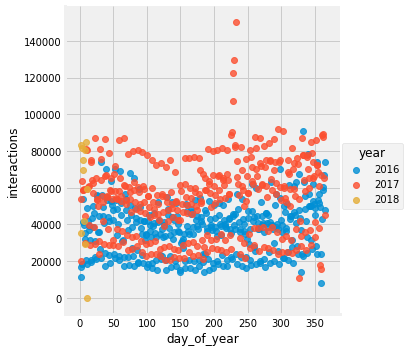

In [16]:
sns.lmplot(x='day_of_year', y='interactions', data=df2,
          fit_reg=False, hue='year');

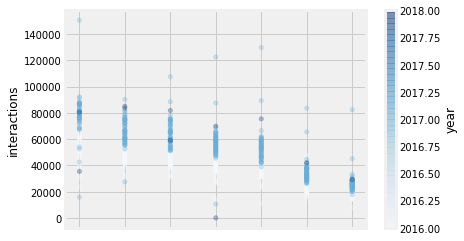

In [17]:
df2.plot(kind='scatter', x='weekday', y='interactions', c='year', alpha=0.3,  colormap='Blues');

In [18]:
df3 = df.copy()
df3 = df3.drop(['hour_of_day'], axis=1).groupby(by='date').sum()
df3['week'] = df3.index.week
df3.reset_index(level=0, inplace=True)
# df3 = df3.set_index('week')
df3['day_of_year'] = pd.to_datetime(df3['date']).apply(lambda x: x.dayofyear)
df3['year'] = pd.to_datetime(df3['date']).apply(lambda x: x.year)
df3['month'] = pd.to_datetime(df3['date']).apply(lambda x: x.month)
df3['weekday'] = pd.to_datetime(df3['date']).apply(lambda x: x.dayofweek)
df3.head()

,date,calls,emails,chats,sms,orders,interactions,week,day_of_year,year,month,weekday
0,2016-01-01,0.0,11152.0,14.0,0.0,6456.0,11166.0,53,1,2016,1,4
1,2016-01-02,0.0,16000.0,961.0,0.0,16592.0,16961.0,53,2,2016,1,5
2,2016-01-03,0.0,17544.0,764.0,0.0,12735.0,18308.0,53,3,2016,1,6
3,2016-01-04,0.0,50848.0,2757.0,0.0,14444.0,53605.0,1,4,2016,1,0
4,2016-01-05,0.0,38604.0,2584.0,0.0,14183.0,41188.0,1,5,2016,1,1


In [19]:
#finding and removing outliers caused by the eclipse
df3 = df3.drop([593,594,595,598])
df3[(df3['month']==8) & (df3['year']==2017)]

,date,calls,emails,chats,sms,orders,interactions,week,day_of_year,year,month,weekday
578,2017-08-01,15188.0,43468.0,3141.0,3648.0,20280.0,65445.0,31,213,2017,8,1
579,2017-08-02,13740.0,43316.0,2847.0,4530.0,18952.0,64433.0,31,214,2017,8,2
580,2017-08-03,14669.0,37808.0,2849.0,5910.0,19244.0,61236.0,31,215,2017,8,3
581,2017-08-04,14796.0,32528.0,2428.0,4619.0,20220.0,54371.0,31,216,2017,8,4
582,2017-08-05,8350.0,16748.0,1773.0,4347.0,24028.0,31218.0,31,217,2017,8,5
583,2017-08-06,4899.0,13212.0,1356.0,5360.0,19568.0,24827.0,31,218,2017,8,6
584,2017-08-07,17177.0,54216.0,3033.0,6298.0,19336.0,80724.0,32,219,2017,8,0
585,2017-08-08,15977.0,44644.0,3384.0,3287.0,20992.0,67292.0,32,220,2017,8,1
586,2017-08-09,15237.0,41068.0,3050.0,4993.0,19972.0,64348.0,32,221,2017,8,2
587,2017-08-10,14947.0,35848.0,2712.0,3238.0,19200.0,56745.0,32,222,2017,8,3


In [20]:
dfyearday = df3.drop(['date','month','weekday','week'],axis=1).groupby(by=['year','day_of_year']).sum()
dfyearday.head()

calls   emails   chats  sms   orders  interactions
year day_of_year                                                    
2016 1              0.0  11152.0    14.0  0.0   6456.0       11166.0
     2              0.0  16000.0   961.0  0.0  16592.0       16961.0
     3              0.0  17544.0   764.0  0.0  12735.0       18308.0
     4              0.0  50848.0  2757.0  0.0  14444.0       53605.0
     5              0.0  38604.0  2584.0  0.0  14183.0       41188.0

In [21]:
dfyearday.reset_index(level=0, inplace=True)
dfyearday.reset_index(level=0, inplace=True)
dfyearday.head()

,day_of_year,year,calls,emails,chats,sms,orders,interactions
0,1,2016,0.0,11152.0,14.0,0.0,6456.0,11166.0
1,2,2016,0.0,16000.0,961.0,0.0,16592.0,16961.0
2,3,2016,0.0,17544.0,764.0,0.0,12735.0,18308.0
3,4,2016,0.0,50848.0,2757.0,0.0,14444.0,53605.0
4,5,2016,0.0,38604.0,2584.0,0.0,14183.0,41188.0


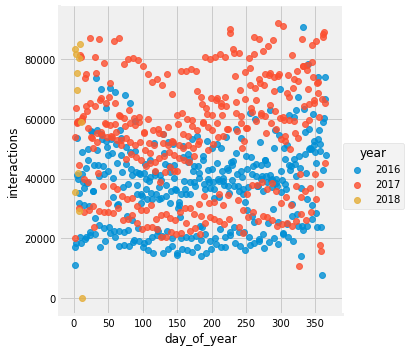

In [22]:
sns.lmplot(x='day_of_year', y='interactions', data=dfyearday,
          fit_reg=False, hue='year');

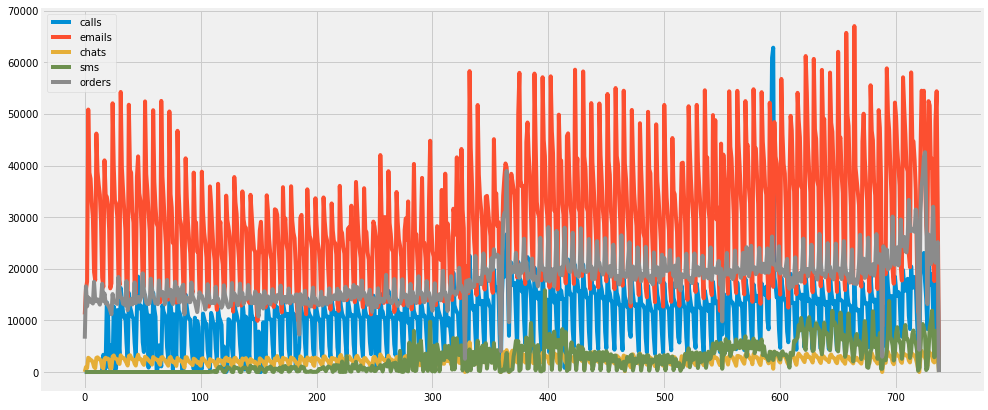

In [23]:
dfyearday[['calls', 'emails','chats','sms','orders']].plot(figsize=(15,7));

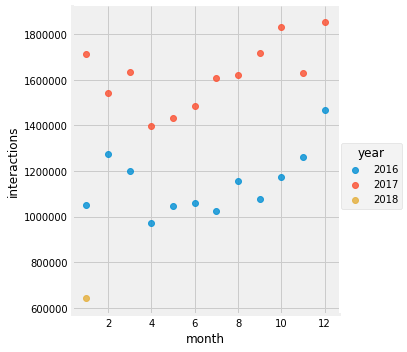

In [24]:
dfyearmonth = df3.drop(['date','day_of_year','weekday','week'],axis=1).groupby(by=['year','month']).sum()

dfyearmonth.reset_index(level=0, inplace=True)
dfyearmonth.reset_index(level=0, inplace=True)

sns.lmplot(x='month', y='interactions', data=dfyearmonth,
          fit_reg=False, hue='year');

In [25]:
#Daily became way to hectic, monthly was too sparse, so let's try Weekly!
dfyearweek = df3.drop(['date','month','weekday','day_of_year'],axis=1).groupby(by=['year','week']).sum()
dfyearweek.head()

calls    emails    chats  sms    orders  interactions
year week                                                         
2016 1         0.0  226788.0  13474.0  0.0  100215.0      240262.0
     2      3705.0  219524.0  14359.0  0.0   99338.0      237588.0
     3     35242.0  202812.0  14232.0  0.0   90457.0      252286.0
     4     35589.0  223544.0  17148.0  0.0  102816.0      276281.0
     5     71026.0  218936.0  16596.0  0.0   97688.0      306558.0

In [26]:
dfyearweek.reset_index(level=0, inplace=True)
dfyearweek.reset_index(level=0, inplace=True)
dfyearweek.head()

,week,year,calls,emails,chats,sms,orders,interactions
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0


In [27]:
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0
105,1,2018,103025.0,249672.0,19432.0,45055.0,166412.0,417184.0
106,2,2018,56755.0,133821.0,11584.0,22492.0,70652.0,224652.0


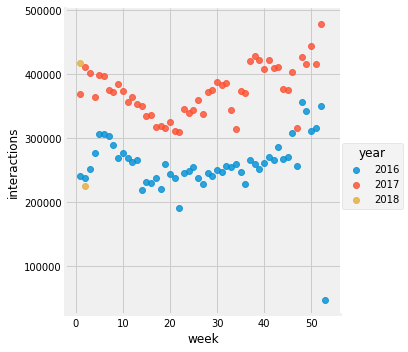

In [28]:
sns.lmplot(x='week', y='interactions', data=dfyearweek,
          fit_reg=False, hue='year');

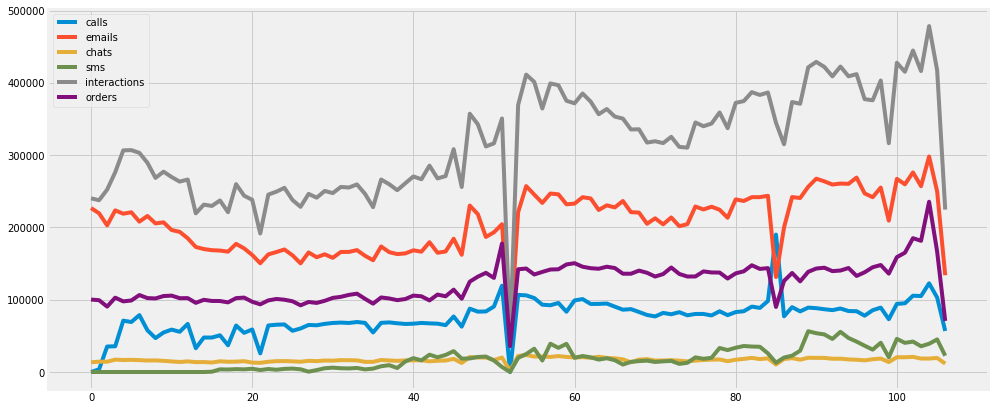

In [29]:
dfyearweek[['calls', 'emails','chats','sms', 'interactions', 'orders']].plot(figsize=(15,7));

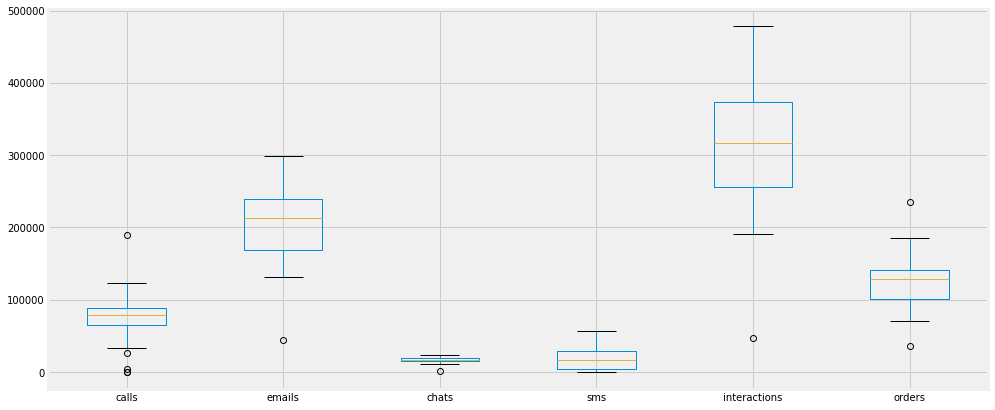

In [30]:
dfyearweek[['calls', 'emails','chats','sms','interactions', 'orders']].boxplot(figsize=(15,7));

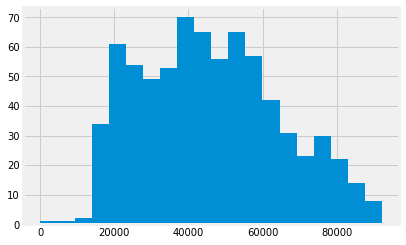

In [31]:
dfyearday.interactions.hist(bins=20);

In [124]:
#THIS SECTION NOW DATA MODELING

#I have lots of other failed attempts you can see in the PK_final_project_notebook

In [84]:
#TRY TESTING OUT USING THIS WEEK TO PREDICT NEXT WEEK.

In [85]:
dfyearweek.head()

,week,year,calls,emails,chats,sms,orders,interactions
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0


In [86]:
#removing outliers caused by week 53
dfyearweek[dfyearweek['week'] == 53]
dfyearweek = dfyearweek.drop([52])

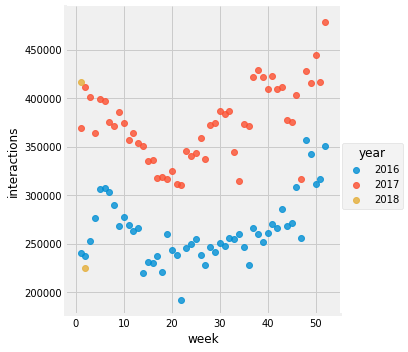

In [87]:
sns.lmplot(x='week', y='interactions', data=dfyearweek,
          fit_reg=False, hue='year');

In [88]:
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0
105,1,2018,103025.0,249672.0,19432.0,45055.0,166412.0,417184.0
106,2,2018,56755.0,133821.0,11584.0,22492.0,70652.0,224652.0


In [89]:
#Adding a new column for next_week_interactions which pulls the next week's interactions
#I am now going to use this as my target variable
dfyearweek['next_week_interactions'] = dfyearweek['interactions'].drop([0]).reset_index().drop(['index'],axis=1)
dfyearweek.head()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0,237588.0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0,252286.0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0,276281.0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0,306558.0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0,306909.0


In [90]:
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0,478495.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0,417184.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0,224652.0
105,1,2018,103025.0,249672.0,19432.0,45055.0,166412.0,417184.0,NaN
106,2,2018,56755.0,133821.0,11584.0,22492.0,70652.0,224652.0,NaN


In [91]:
#dropping the two weeks from 2018
dfyearweek = dfyearweek.drop([105,106])
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions
100,48,2017,94240.0,267192.0,20482.0,45821.0,158896.0,427735.0,444674.0
101,49,2017,95048.0,259592.0,20355.0,40308.0,165016.0,415303.0,416274.0
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0,478495.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0,417184.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0,224652.0


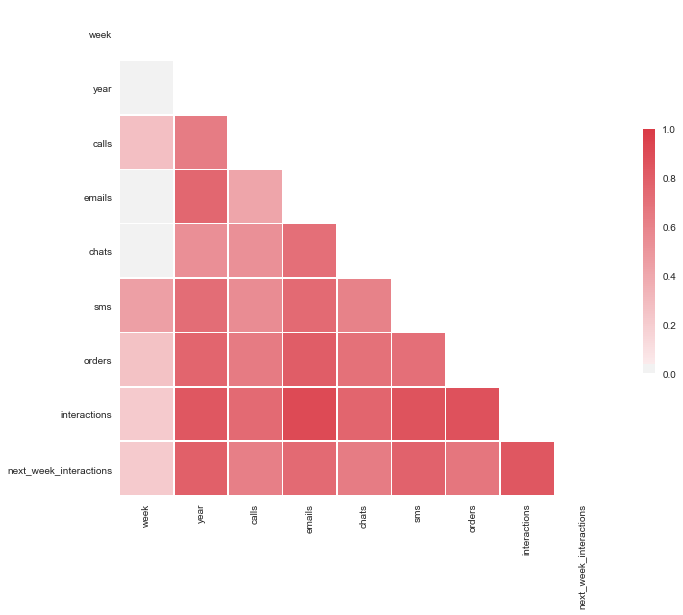

In [92]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = dfyearweek.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [93]:
#creating dummies for weeks
dummies_week = pd.get_dummies(dfyearweek.week, prefix='week')
dummies_week.drop(dummies_week.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
dfyearweekdummies = pd.concat([dfyearweek, dummies_week], axis=1)

# Print 5 random rows.
dfyearweekdummies.head()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions,week_2,...,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0,237588.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0,252286.0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0,276281.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0,306558.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0,306909.0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
dummies_year = pd.get_dummies(dfyearweek.year, prefix='year')
dummies_year.drop(dummies_year.columns[0], axis=1, inplace=True)
dfyearweekdummies = pd.concat([dfyearweekdummies, dummies_year], axis=1)
dfyearweekdummies.head()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions,week_2,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,year_2017
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0,237588.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0,252286.0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0,276281.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0,306558.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0,306909.0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Create feature matrix (X).
feature_cols = ['year', 'orders', 'calls','emails','chats','sms', 'interactions','week', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6','week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47','week_48','week_49','week_50','week_51','week_52']
X = dfyearweekdummies[feature_cols]

# Create response vector (y).
y = dfyearweekdummies.next_week_interactions

In [96]:
from sklearn.ensemble import RandomForestRegressor

# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
14,week_8,0.000355
28,week_22,0.000373
18,week_12,0.000392
35,week_29,0.000474
17,week_11,0.000528
24,week_18,0.000588
15,week_9,0.000624
8,week_2,0.000631
13,week_7,0.000728
32,week_26,0.000737


In [97]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.723317834338


31382.776512933749

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(78, 8)
(78, 30)


In [99]:
# Create a new feature matrix that only includes important features.

X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

# Check the RMSE for a random forest that only includes important features.
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

26720.968428305699

In [100]:
######Optional: Tuning Individual Parameters
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()


# List of values to try for n_estimators:
estimator_range = list(range(70, 125, 1))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

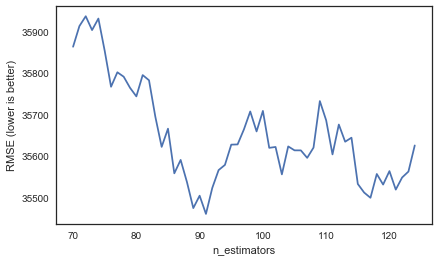

In [101]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).
plt.plot(estimator_range, RMSE_scores);

plt.xlabel('n_estimators');
plt.ylabel('RMSE (lower is better)');

In [102]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, estimator_range))[0]

(35460.916937965994, 91)

In [103]:
# Tuning max_features
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=91, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

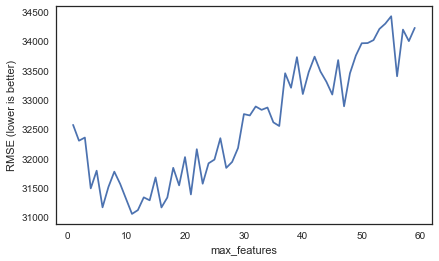

In [104]:
# Plot max_features (x-axis) versus RMSE (y-axis).

plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

In [105]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

(31054.919308661843, 11)

In [106]:
# Create feature matrix (X).
feature_cols = ['year', 'orders', 'calls','emails','chats','sms', 'interactions','week', 'week_47','week_50','week_52']
X = dfyearweekdummies[feature_cols]

# Create response vector (y).
y = dfyearweekdummies.next_week_interactions
###

from sklearn.ensemble import RandomForestRegressor

# # # max_features=5 is best and n_estimators=150 is sufficiently large.
# rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
# rfreg.fit(X, y)

# # # Compute feature importances.
# # pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

#####
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)


scores = cross_val_score(rfreg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

26876.024840238177

In [107]:
# Create feature matrix (X).
feature_cols = ['year', 'orders', 'calls','emails','chats','sms', 'interactions', 'week','week_2', 'week_3', 'week_4', 'week_5', 'week_6','week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47','week_48','week_49','week_50','week_51','week_52']
X = dfyearweekdummies[feature_cols]

# Create response vector (y).
y = dfyearweekdummies.next_week_interactions
###

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

scores = cross_val_score(rfreg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

26522.242034155606

In [108]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
46,week_40,0.000000
45,week_39,0.000000
21,week_15,0.000000
31,week_25,0.000000
12,week_6,0.000000
38,week_32,0.000041
35,week_29,0.000042
14,week_8,0.000080
8,week_2,0.000091
36,week_30,0.000123


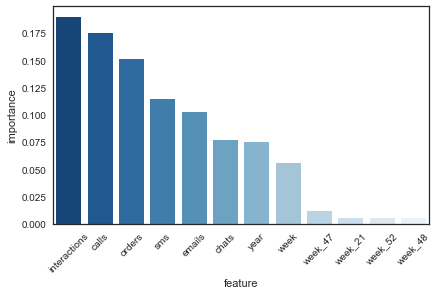

In [122]:
features = pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending = False)

features = features[:12]
sns.barplot(x='feature', y='importance', data=features, palette='Blues_r')
plt.xticks(rotation=45)
plt.show()

In [110]:
from sklearn.metrics import accuracy_score
predicted = rfreg.predict(X_test)
# accuracy = accuracy_score(y_test, predicted)
accuracy = accuracy_score(y_test, predicted.round(), normalize=False)


# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# #compute the mean accuracy score
print accuracy

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.718601059
0


31054.919308661843

In [111]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rfreg.predict(X_train)
predicted_test = rfreg.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print('Out-of-bag R-2 score estimate:') 
rfreg.oob_score_


Out-of-bag R-2 score estimate:


0.71860105900039928

In [112]:
print('Test data R-2 score:') 
test_score


Test data R-2 score:


0.84509102580223594

In [113]:
print('Test data Spearman correlation:') 
spearman[0]

Test data Spearman correlation:


0.94051282051282048

In [123]:
pearson = pearsonr(y_test, predicted_test)
print('Test data Pearson correlation:') 
pearson[0]

Test data Pearson correlation:


0.92072581662943953

In [117]:
rfreg.score(X_test, y_test)

0.84509102580223594

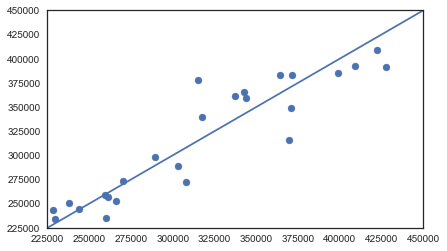

In [118]:
y_pred = rfreg.predict(X_test)
plt.scatter(x=y_test, y=y_pred)
plt.xlim([225000,450000])
plt.ylim([225000,450000])
plt.plot([225000,450000],[225000,450000])
plt.show()

In [178]:
#The model fits the test set reasonably well with an R2 of 0.845

In [180]:
#Conclusion
#This worked quite well and likely much better than our current method of forecasting by either order volume or interaction volume.
#I will go back and re-run these steps with actual data, where I'll be able to identify outliers a bit better (because the data will make sense)
#Hopefully we can operationalize this and use it for demand forecasting, as well as staffing utilization, to staff the appropriate headcount the week before
